# Plots for 30 DFT geometry optimized and CREST (best) conformers

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import os
from os.path import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# hartree = 627.509 kcal/mol
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile',
         'Creatinine', 'Methyleugenol', 'N6-methyladenosine', 'Cholic Acid', 'Astilbin',
         'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
key = ['BXNJHAXVSOCGBA-UHFFFAOYSA-N','UTAIYTHAJQNQDW-KQYNXXCUSA-N','WWUZIQQURGPMPG-CCEZHUSRSA-N',
         'AUNGANRZJHBGPY-SCRDCRAPSA-N','NNICRUQPODTGRU-SVGMAFHSNA-N','DDRJAANPRJIHGJ-UHFFFAOYSA-N',
         'ZYEMGPIYFIJGTP-UHFFFAOYSA-N','VQAYFKKCNSOZKM-IOSLPCCCSA-N','BHQCQFFYRZLCQQ-OELDTZBJSA-N',
         'ZROGCCBNZBKLEL-MPRHSVQHSA-N','UVLWLKCNNYTXDT-XDTORHTBNA-N','QBUVFDKTZJNUPP-BBROENKCNA-N',
         'RWZYAGGXGHYGMB-UHFFFAOYSA-N','HSMNQINEKMPTIC-UHFFFAOYSA-N','UYARPHAXAJAZLU-KQYNXXCUSA-N',
         'CZMRCDWAGMRECN-UGDNZRGBSA-N','DFPMSGMNTNDNHN-ZPHOTFPESA-N','PGPMCWZMPPZJML-UHIQGXGONA-N']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', 
          '22', '24', '25', '28', '29']
adducts = ['+H','+H','+H','+H','+H',
           '+Na','+Na','+Na','+Na','+Na','+Na','+Na', 
           '-H', '-H', '-H', '-H', '-H', '-H']
hexs = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', 
        '00f9c7', '00f4f9', '00b6f9', '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 
        'a5a5a5', 'e3e3e3']
mass = [212.094963, 297.1073186, 299.2824294, 376.1382844, 133.0527639, 113.0589119,
        178.0993797, 281.112404, 408.2875744, 450.1162115, 490.2135746, 582.2478348,
        137.0476785, 194.0691422, 297.1073186, 342.1162115, 580.1792057, 687.4839047]
measured_ccs = [146.0325256,168.8025133,185.9982654,188.2701189,128.8706988,
                133.4133026,160.3573607,170.3984356,197.3492728,212.6368764,203.5,246.7305824,
                123.9943094,147.5516757,163.7763677,168.4673882,217.3286278,256.3]

In [3]:
# # These files are missing for the simple crest dft geometry optimization
# '02','11','12','16','21','22'
# 'BXNJHAXVSOCGBA-UHFFFAOYSA-N', 'DDRJAANPRJIHGJ-UHFFFAOYSA-N',
# 'ZYEMGPIYFIJGTP-UHFFFAOYSA-N','BHQCQFFYRZLCQQ-OELDTZBJSA-N',
# 'RWZYAGGXGHYGMB-UHFFFAOYSA-N','HSMNQINEKMPTIC-UHFFFAOYSA-N

### When I first ran CREST, I ran using DFT geometry optimized conformers as input molecules for CREST. "crest structure simple" means I reran CREST using non-optimized AMBER conformers. Red indicates where I started from DFT, blue from AMBER without DFT.

Missing file6 for 02
using new file
03
297.1073186


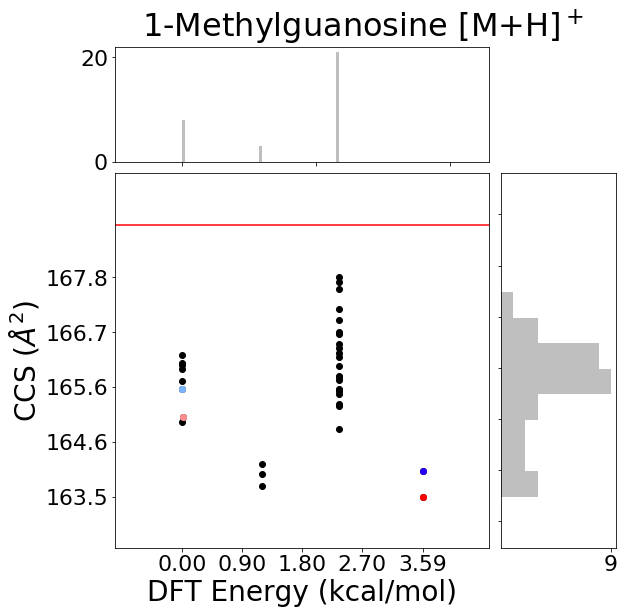

04
299.2824294


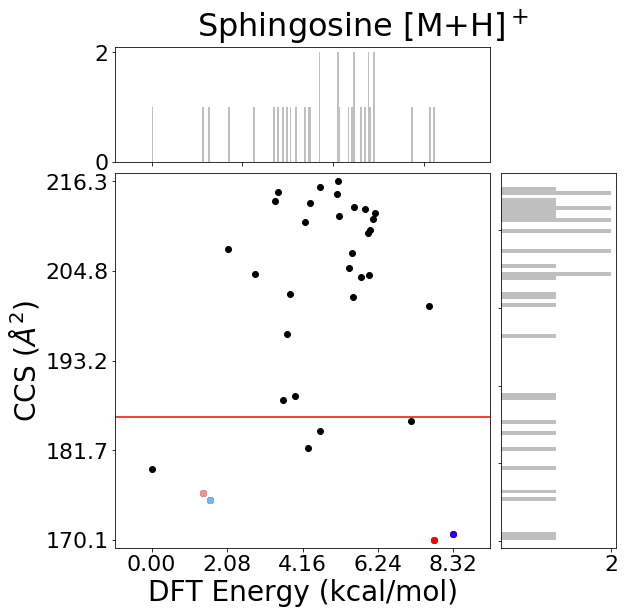

Missing file6 for 05
10
133.0527639


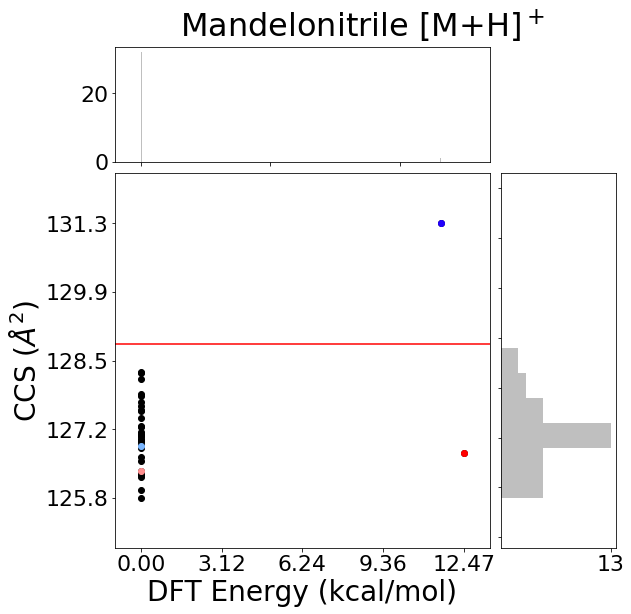

Missing file6 for 11
Missing file6 for 12
14
281.112404


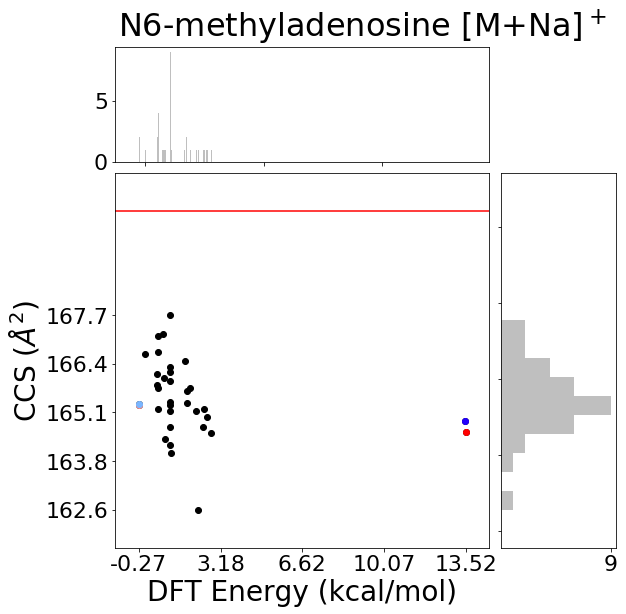

Missing file6 for 16
using new file
17
450.1162115


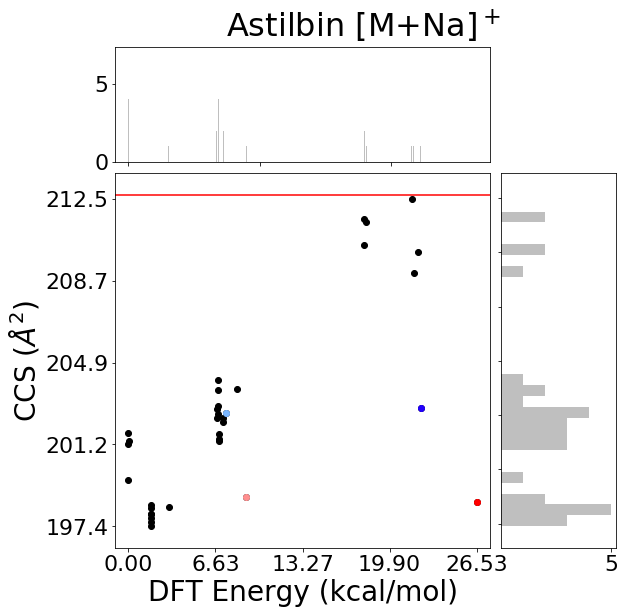

using new file
18
490.2135746


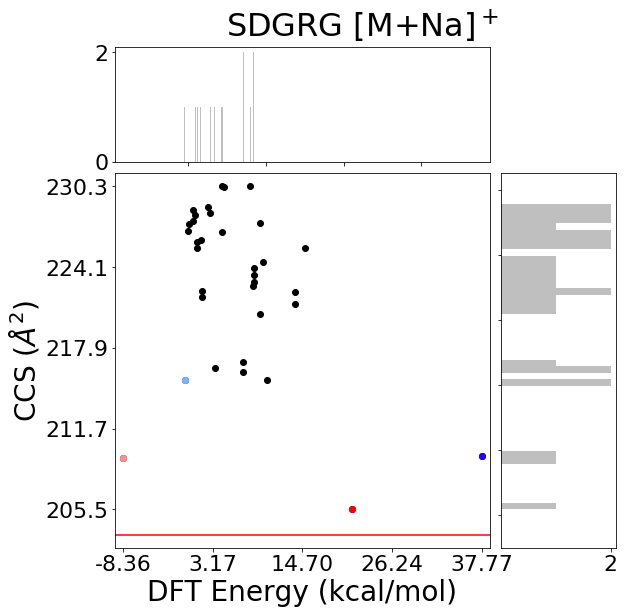

using new file
19
582.2478348


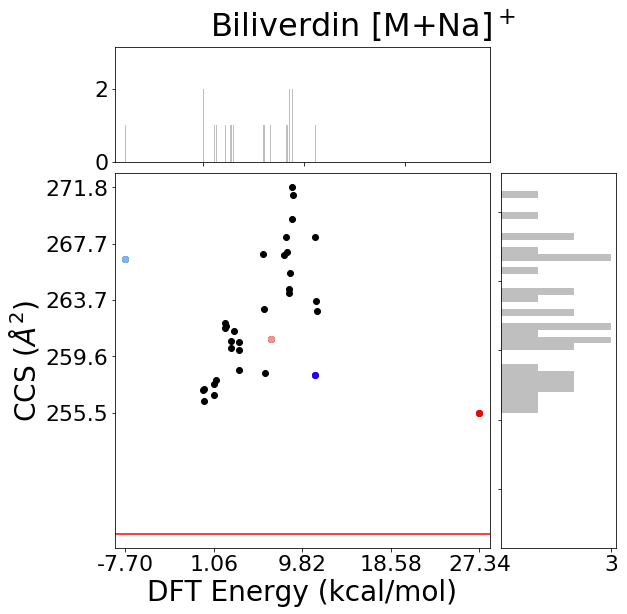

Missing file6 for 21
Missing file6 for 22
24
297.1073186


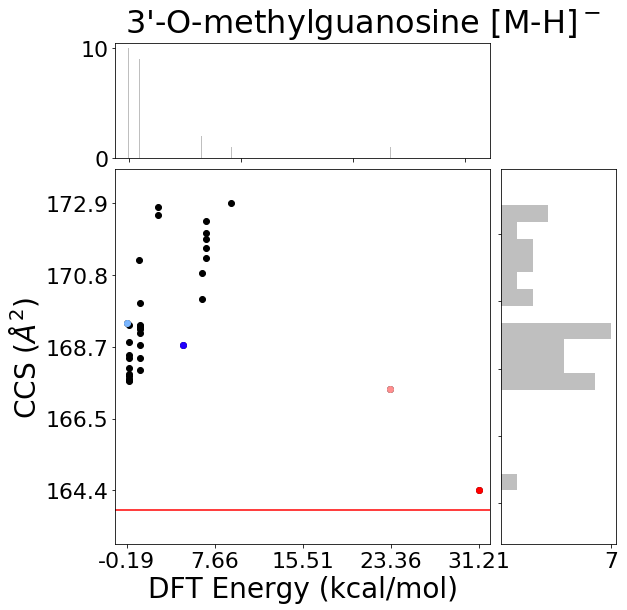

25
342.1162115


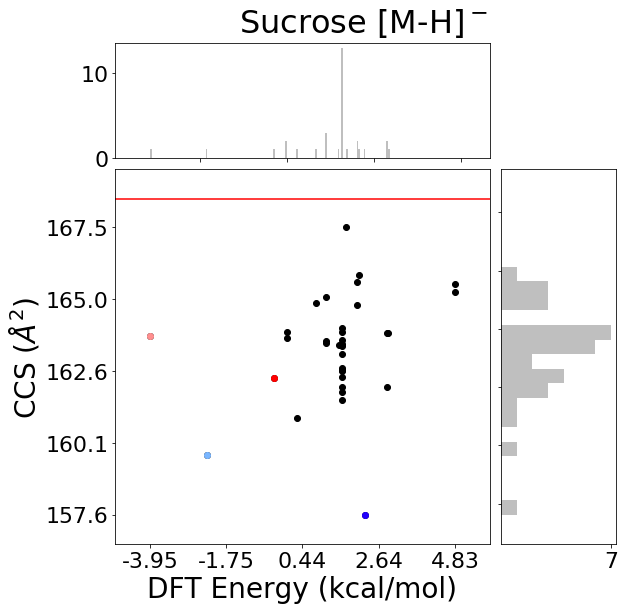

28
580.1792057


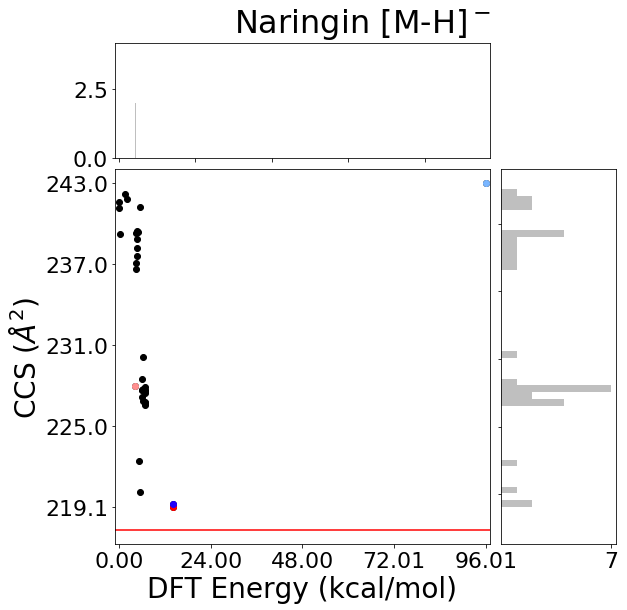

In [4]:
for d, ID in enumerate(molids[:-1]):
    file = f'../data/dgo_30/multconformer_ccs/molid{ID}_ccs_30dgo.csv'
    file2 = glob.glob(f'../data/crest/tsvs-crest-structure/{key[d]}*.tsv')[0]
    file3 = glob.glob(f'../data/crest/tsvs-dgo-structure/{key[d]}*.tsv')[0]
    file4 = glob.glob(f'../data/crest/tsvs-crest-structure-simple/{key[d]}*0002_geom01.tsv')
    
    

    file5 = f'../data/dgo_30/newbench0.1/{key[d]}_{adducts[d]}.csv'
    file6 = glob.glob(f'../data/crest/tsvs-dgo-structure-simple/{key[d]}*0002_geom01.tsv')
    
    if not file6:
        print(f'Missing file6 for {ID}')
        continue
        
    if not file4:
        print(f'Missing file4 for {ID}')
        continue
        
    
    
    if os.path.exists(file5):
        df = pd.read_csv(file5)
        print('using new file')
    else:
        df = pd.read_csv(file)
        
        
    print(ID)
    print(mass[d])
    
    df2 = pd.read_csv(file2, delim_whitespace=True)
    df3 = pd.read_csv(file3, delim_whitespace=True)
    df4 = pd.read_csv(file4[0], delim_whitespace=True)
    df6 = pd.read_csv(file6[0], delim_whitespace=True)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently are meaningless to compare to each other
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = df['dft_energy'].min()
    df['dft_energy'] -= mn
    
    # Convert CREST energy to kcal/mol
    df2['dft_energy'] *= 627.509
    df2['dft_energy'] -= mn
    df3['dft_energy'] *= 627.509
    df3['dft_energy'] -= mn
    df4['dft_energy'] *= 627.509
    df4['dft_energy'] -= mn 
    df6['dft_energy'] *= 627.509
    df6['dft_energy'] -= mn     
    

    #x = df['dft_energy']
    #y = df['ccs']    
    
#     x_interm = np.append(df['dft_energy'], df2['dft_energy'])
#     x_interm2 = np.append(df3['dft_energy'], df4['dft_energy'])

#     y_interm = np.append(df['ccs'], df2['ccs'])
#     y_interm2 = np.append(df3['ccs'], df4['ccs'])
    
#     x = np.append(x_interm, x_interm2)
#     y = np.append(y_interm, y_interm2)
    x = np.concatenate([df['dft_energy'], df2['dft_energy'], df3['dft_energy'], df4['dft_energy'], df6['dft_energy']])
    y = np.concatenate([df['ccs'], df2['ccs'], df3['ccs'], df4['ccs'], df6['ccs']])

    nullfmt = NullFormatter()

    # Define the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]


    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z)

    binwidth = 0.25

    # Set limits.  Include the measured ccs in the y limit
    y_combine = np.append(y, measured_ccs[d])
    axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
    axScatter.set_ylim((np.min(y_combine)-1,np.max(y_combine)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

    binwidthx = 0.05
    binwidthy = 0.5
    binx = np.arange(np.min(x), np.max(x), binwidthx)
    biny = np.arange(np.min(y), np.max(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)

    # Adjust tick sizes and fonts

    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


    #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real Gibb's values
    xtic = np.linspace(np.min(x), np.max(x), 5)
    ytic = np.linspace(np.min(y), np.max(y), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    #axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])

    # Plot CREST conformer as blue dot
    axScatter.scatter(df2['dft_energy'], df2['ccs'], c='#ff0000') # red
    axScatter.scatter(df3['dft_energy'], df3['ccs'], c='#ff8f8f') # light red
    
    axScatter.scatter(df4['dft_energy'], df4['ccs'], c='#2200fc') # blue
    axScatter.scatter(df6['dft_energy'], df6['ccs'], c='#7ab6ff') # light blue, DGO
    
    # Plot measured
    axScatter.axhline(measured_ccs[d], color='red')
    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
    plt.show()
    #plt.savefig('Harmine+H_ccs_v_energy.png', dpi=600)

Missing file6 for 02
using new file
03
297.1073186


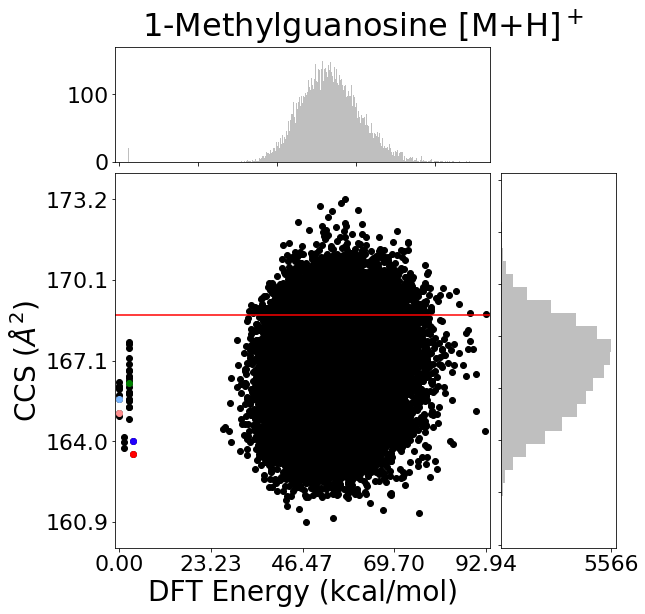

04
299.2824294


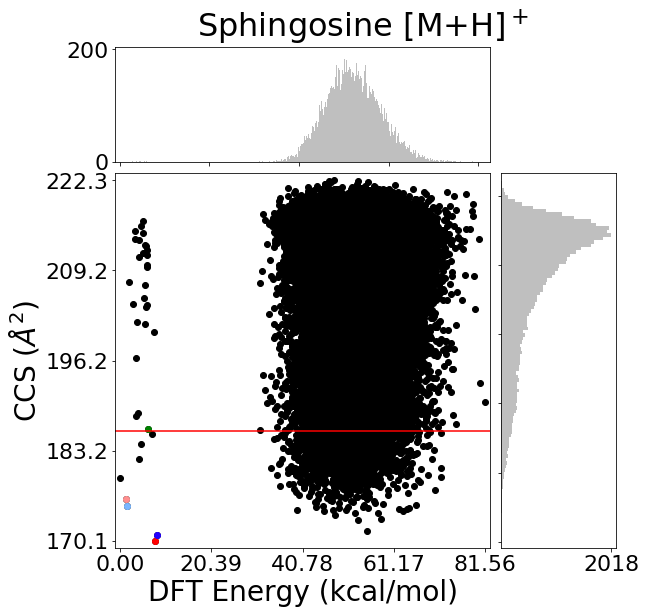

Missing file6 for 05
10
133.0527639


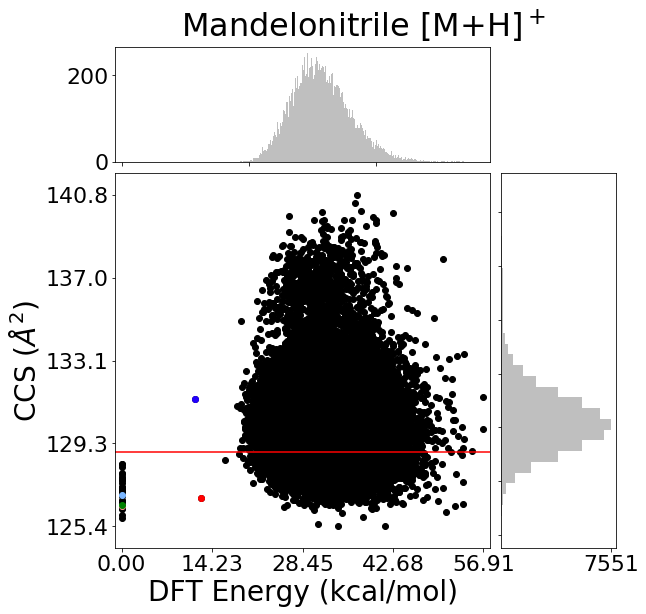

Missing file6 for 11
Missing file6 for 12
14
281.112404


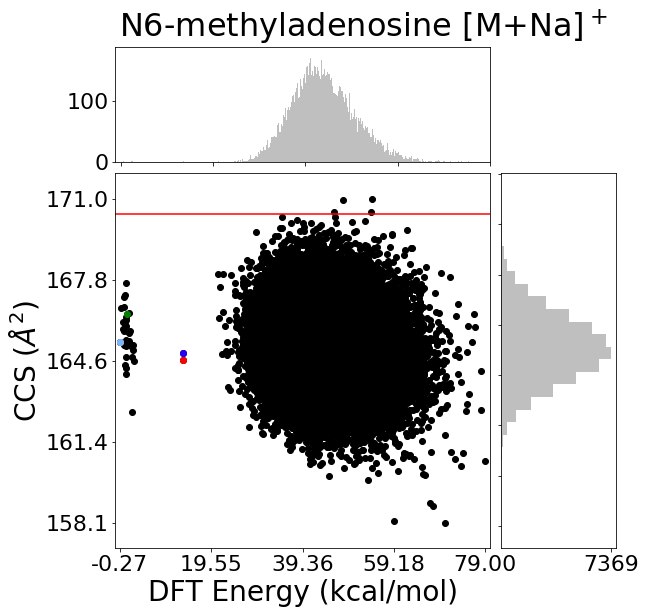

Missing file6 for 16
using new file
17
450.1162115


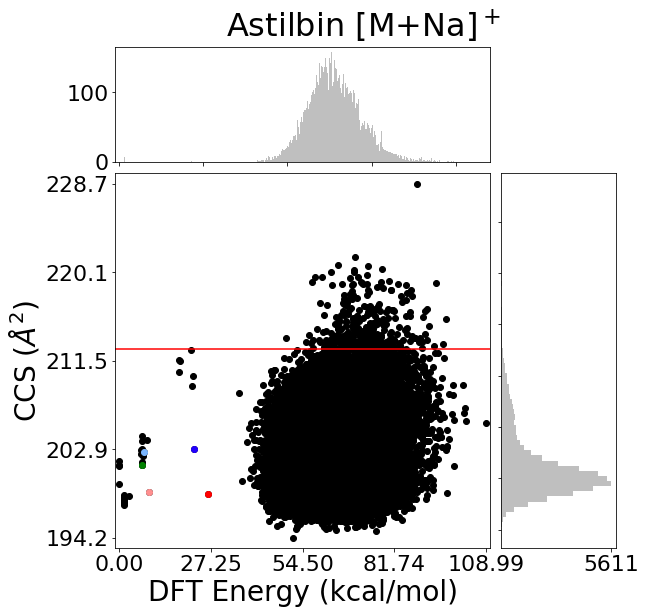

using new file
18
490.2135746


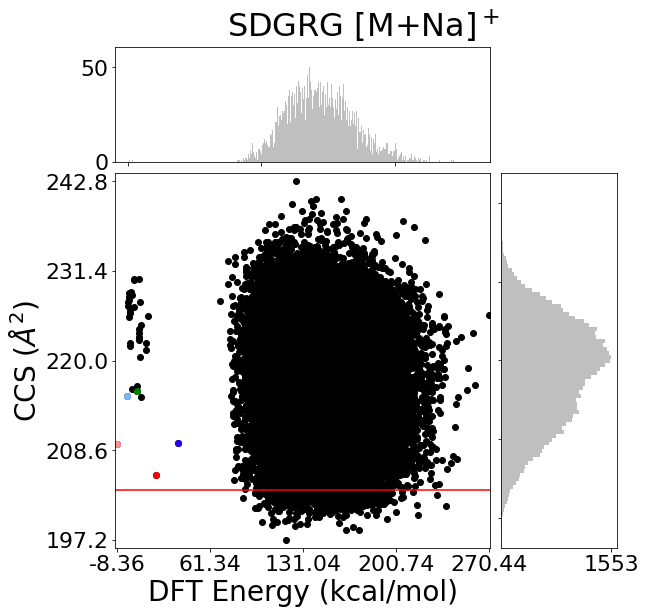

using new file
19
582.2478348


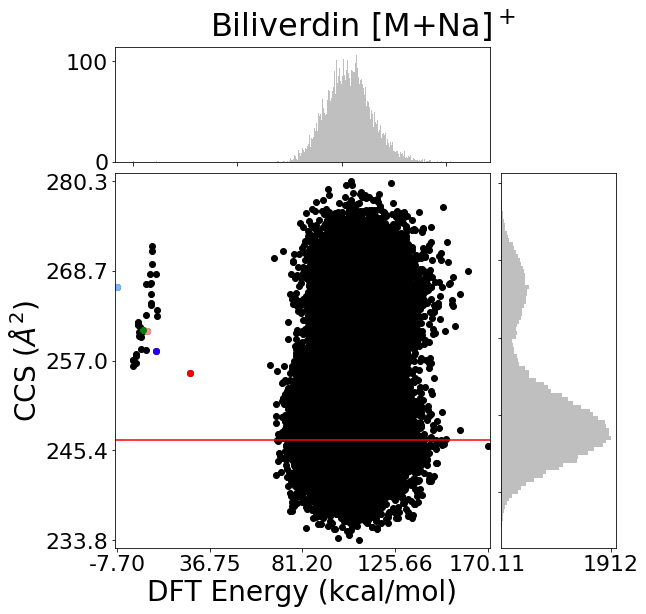

Missing file6 for 21
Missing file6 for 22
24
297.1073186


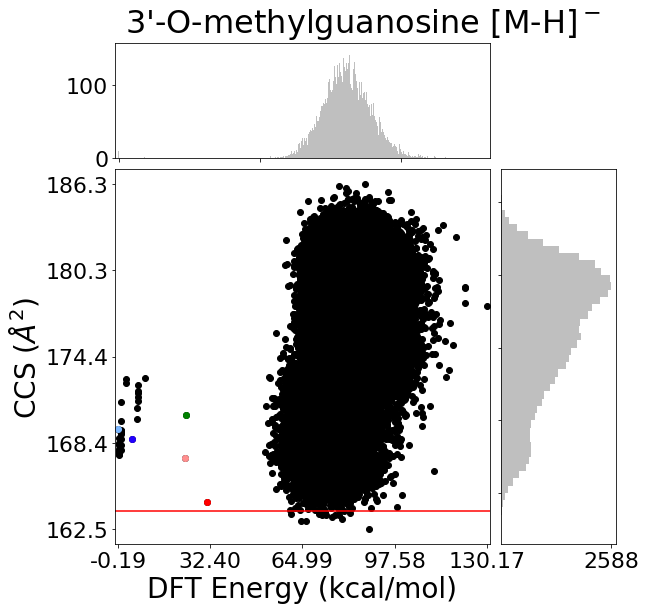

25
342.1162115


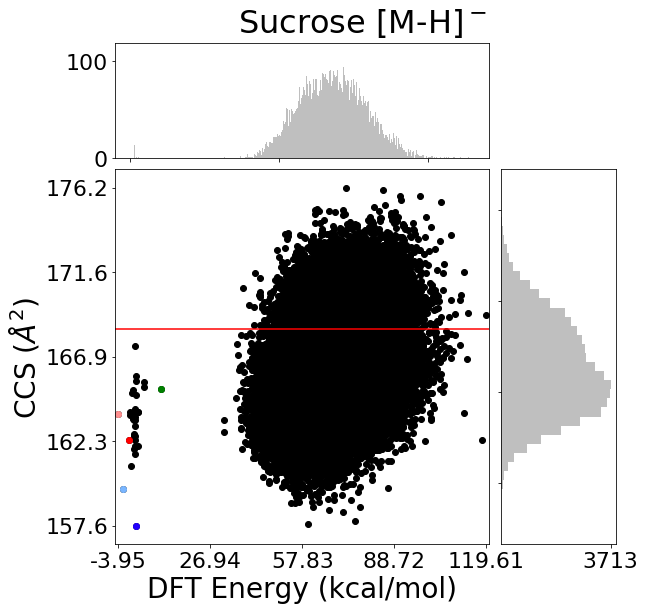

28
580.1792057


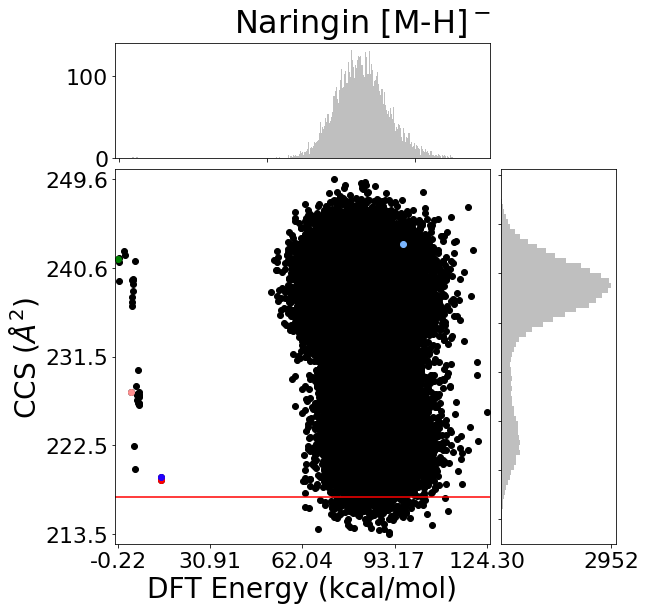

In [5]:
for d, ID in enumerate(molids[:-1]):
    file = f'../data/dgo_30/multconformer_ccs/molid{ID}_ccs_30dgo.csv'
    file2 = glob.glob(f'../data/crest/tsvs-crest-structure/{key[d]}*.tsv')[0]
    file3 = glob.glob(f'../data/crest/tsvs-dgo-structure/{key[d]}*.tsv')[0]
    file4 = glob.glob(f'../data/crest/tsvs-crest-structure-simple/{key[d]}*0002_geom01.tsv')
    file5 = f'../data/molid{ID}_ccs.csv'
    

    file6 = glob.glob(f'../data/crest/tsvs-dgo-structure-simple/{key[d]}*0002_geom01.tsv')
    file7 = f'../data/sample_dgo_conformer_ccs_18/{key[d]}_{adducts[d]}_0002_geom02.tsv'    
    file0 = f'../data/dgo_30/newbench0.1/{key[d]}_{adducts[d]}.csv'
    
    if not file6:
        print(f'Missing file6 for {ID}')
        continue
        
    if not file4:
        print(f'Missing file4 for {ID}')
        continue
        
    
    
    if os.path.exists(file0):
        df = pd.read_csv(file0)
        print('using new file')
    else:
        df = pd.read_csv(file)
        
        
    print(ID)
    print(mass[d])
    
    df2 = pd.read_csv(file2, delim_whitespace=True)
    df3 = pd.read_csv(file3, delim_whitespace=True)
    df4 = pd.read_csv(file4[0], delim_whitespace=True)
    df5 = pd.read_csv(file5)
    df6 = pd.read_csv(file6[0], delim_whitespace=True)
    df7 = pd.read_csv(file7, delim_whitespace=True)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently are meaningless to compare to each other
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = df['dft_energy'].min()
    df['dft_energy'] -= mn
    
    # Convert CREST energy to kcal/mol
    df2['dft_energy'] *= 627.509
    df2['dft_energy'] -= mn
    df3['dft_energy'] *= 627.509
    df3['dft_energy'] -= mn
    df4['dft_energy'] *= 627.509
    df4['dft_energy'] -= mn 
    df5['dft_energy'] *= 627.509
    df5['dft_energy'] -= mn       
    df6['dft_energy'] *= 627.509
    df6['dft_energy'] -= mn     
    df7['dft_energy'] *= 627.509
    df7['dft_energy'] -= mn     

    x = np.concatenate([df['dft_energy'], df2['dft_energy'], df3['dft_energy'],
                        df4['dft_energy'], df5['dft_energy'], df6['dft_energy'], df7['dft_energy']])
    y = np.concatenate([df['ccs'], df2['ccs'], df3['ccs'], df4['ccs'], df5['ccs'], df6['ccs'], df7['ccs']])

    nullfmt = NullFormatter()

    # Define the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]


    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z)

    binwidth = 0.25

    # Set limits.  Include the measured ccs in the y limit
    y_combine = np.append(y, measured_ccs[d])
    axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
    axScatter.set_ylim((np.min(y_combine)-1,np.max(y_combine)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

    binwidthx = 0.05
    binwidthy = 0.5
    binx = np.arange(np.min(x), np.max(x), binwidthx)
    biny = np.arange(np.min(y), np.max(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)

    # Adjust tick sizes and fonts

    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


    #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real Gibb's values
    xtic = np.linspace(np.min(x), np.max(x), 5)
    ytic = np.linspace(np.min(y), np.max(y), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    #axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])

    # Plot CREST conformers and extra dgo conformere
    axScatter.scatter(df2['dft_energy'], df2['ccs'], c='#ff0000') # DFT-go start crest
    axScatter.scatter(df3['dft_energy'], df3['ccs'], c='#ff8f8f')
    
    axScatter.scatter(df4['dft_energy'], df4['ccs'], c='#2200fc') # MD start crest
    axScatter.scatter(df6['dft_energy'], df6['ccs'], c='#7ab6ff')
    
    axScatter.scatter(df7['dft_energy'], df7['ccs'], c='green') #, s=10) # timing DFT-go
    
    # Plot measured
    axScatter.axhline(measured_ccs[d], color='red')
    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
    plt.show()
    #plt.savefig('Harmine+H_ccs_v_energy.png', dpi=600)

## The tautomerization step for the 50k and how ISiCLE runs as of June 2020 are different for some molecules. You can see that here.
## Yellow is running DFT geom opt on 50 pulled out of the 50k. Orange is rerunning ISiCLE from scratch on the smi or inchis. The orange aligns with a relatively recent ISiCLE benchmark run, the yellow aligns with the CCS of the black "cloud" of 50k.

11


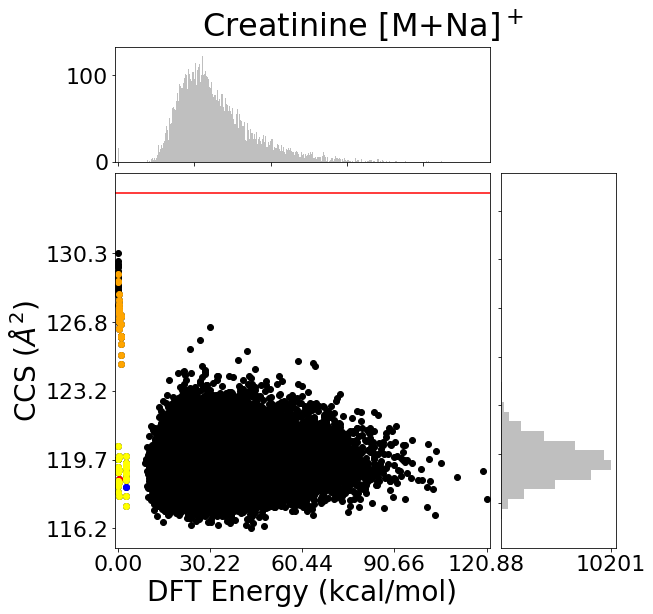

16


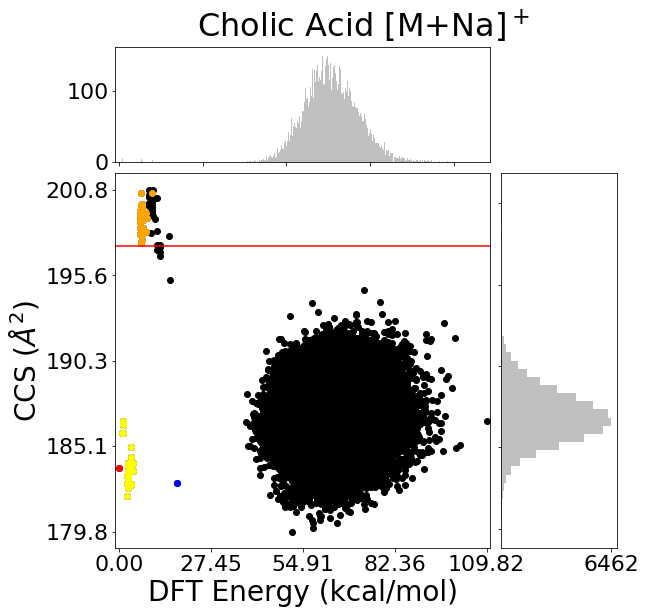

In [14]:
# Plot them all with the rerun 30 dft geom opt benchmark (two molecules, cholic acid and creatinine)

for d, ID in enumerate(molids[:17]):
    file = f'../data/dgo_30/multconformer_ccs/molid{ID}_ccs_30dgo.csv'
    file2 = glob.glob(f'../data/crest/tsvs-crest-structure/{key[d]}*.tsv')[0]
    #file2 = glob.glob(f'../data/crest/tsvs-crest-structure/{key[d]}*.tsv')[0]
    file3 = glob.glob(f'../data/crest/tsvs-dgo-structure/{key[d]}*.tsv')[0]
    file4 = f'../data/molid{ID}_ccs.csv'
    file5 = f'../data/sample_dgo_conformer_ccs_18/{key[d]}_{adducts[d]}_0002_geom02.tsv'
    file6 = f'../data/dgo_30/newbench/{key[d]}_{adducts[d]}.tsv'
    file7 = f'../data/dgo_30/newbench0.1/{key[d]}_{adducts[d]}.csv'
    
    if os.path.exists(file6):
        pass
    else:
        #print('missing file ', file6)
        continue     
    print(ID)
    #print(mass[d])
    
    df = pd.read_csv(file)
    df2 = pd.read_csv(file2, delim_whitespace=True)
    df3 = pd.read_csv(file3, delim_whitespace=True)
    df4 = pd.read_csv(file4)
    df5 = pd.read_csv(file5, delim_whitespace=True)
    df6 = pd.read_csv(file6, delim_whitespace=True)
    df7 = pd.read_csv(file7)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    allE1 = np.append(df['dft_energy'], df2['dft_energy'])
    allE2 = np.append(df3['dft_energy'], df4['dft_energy'])
    allE3 = np.append(df5['dft_energy'], df6['dft_energy'])
    allE3 = np.append(allE3, df7['dft_energy'])
    allE = np.append(allE1, allE2)
    allE = np.append(allE, allE3)
    allE *= 627.509 # Convert hartree to kcal/mol 
    mn = np.min(allE)
    allE -= mn
    
    df['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    df['dft_energy'] -= mn
    
    # Convert CREST energy to kcal/mol
    df2['dft_energy'] *= 627.509
    df2['dft_energy'] -= mn
    df3['dft_energy'] *= 627.509
    df3['dft_energy'] -= mn
    df4['dft_energy'] *= 627.509
    df4['dft_energy'] -= mn
    df5['dft_energy'] *= 627.509
    df5['dft_energy'] -= mn
    df6['dft_energy'] *= 627.509
    df6['dft_energy'] -= mn         
    df7['dft_energy'] *= 627.509
    df7['dft_energy'] -= mn    
    
    
    #x = df['dft_energy']
    #y = df['ccs']    
    
    #x_interm = np.append(df['dft_energy'], df2['dft_energy'])
    #x = np.append(x_interm, df3['dft_energy'])
    x = allE
    y_interm1 = np.append(df['ccs'], df2['ccs']) 
    y_interm2 = np.append(df3['ccs'], df4['ccs'])
    y_interm3 = np.append(df5['ccs'], df6['ccs'])
    y_interm3 = np.append(y_interm3, df7['ccs'])
    y_interm = np.append(y_interm1, y_interm2)
    y = np.append(y_interm, y_interm3)


    nullfmt = NullFormatter()

    # Define the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]


    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z)

    binwidth = 0.25

    # Set limits.  Include the measured ccs in the y limit
    y_combine = np.append(y, measured_ccs[d])
    axScatter.set_xlim((np.min(x)-1,np.max(x)+1))
    axScatter.set_ylim((np.min(y_combine)-1,np.max(y_combine)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)

    binwidthx = 0.05
    binwidthy = 0.5
    binx = np.arange(np.min(x), np.max(x), binwidthx)
    biny = np.arange(np.min(y), np.max(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)

    # Adjust tick sizes and fonts

    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


    #xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3) # For using real Gibb's values
    xtic = np.linspace(np.min(x), np.max(x), 5)
    ytic = np.linspace(np.min(y), np.max(y), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    #axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])

    # Plot CREST conformer as blue dot
    axScatter.scatter(df2['dft_energy'], df2['ccs'], c='b')
    axScatter.scatter(df3['dft_energy'], df3['ccs'], c='r')
    axScatter.scatter(df5['dft_energy'], df5['ccs'], c='g')
    axScatter.scatter(df6['dft_energy'], df6['ccs'], c='orange')
    axScatter.scatter(df7['dft_energy'], df7['ccs'], c='yellow')
        
    # Plot measured
    axScatter.axhline(measured_ccs[d], color='red')
    
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.35, x=-1.2)
    plt.show()
    #plt.savefig('Harmine+H_ccs_v_energy.png', dpi=600)